In [1]:
from ml_p3.LSTM import LSTMNetwork, AdamLSTM
from ml_p3.utils.utils import prepare_eth_data
import matplotlib.pyplot as plt
from ml_p3.plotting import plot_eth_data, plot_grid_search_heatmap

## Prequisites


In [2]:
input_dim = 5  # features: open, high, low, close, volume
output_dim = 1  # predict one price (closing price)
future_steps = 1  # predict 1 steps into the future
batch_size = 32
learning_rate = 0.01
epochs = 50
data_file_path = r"C:\Users\javid.rezai\CSMaster\fys-stk4155\ml\miniature-octo-waddle\ml-p3\tests\data\ETHUSD_1m_Binance.csv"

## Grid Search


In [3]:
from ml_p3.utils.grid_search import grid_search_keras_lstm, grid_search_lstm

In [4]:
param_grid = {
    "lookback": [1, 2, 4, 8, 16],
    "hidden_dim": [8, 16, 32],
}

In [5]:
results_custom = grid_search_lstm(
    data_file_path,
    param_grid,
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=learning_rate,
)

Training with parameters: {'lookback': 1, 'hidden_dim': 8}
X_train shape: (2115, 1, 5), Y_train shape: (2115, 1, 1)
Epoch 1/50, Loss: 0.011565
Epoch 2/50, Loss: 0.000390
Epoch 3/50, Loss: 0.000399
Epoch 4/50, Loss: 0.000379
Epoch 5/50, Loss: 0.001412
Epoch 6/50, Loss: 0.000367
Epoch 7/50, Loss: 0.000422
Epoch 8/50, Loss: 0.000365
Epoch 9/50, Loss: 0.000467
Epoch 10/50, Loss: 0.000379
Epoch 11/50, Loss: 0.002595
Epoch 12/50, Loss: 0.000424
Epoch 13/50, Loss: 0.000381
Epoch 14/50, Loss: 0.000659
Epoch 15/50, Loss: 0.000365
Epoch 16/50, Loss: 0.000433
Epoch 17/50, Loss: 0.000465
Epoch 18/50, Loss: 0.000651
Epoch 19/50, Loss: 0.000951
Epoch 20/50, Loss: 0.000369
Epoch 21/50, Loss: 0.000359
Epoch 22/50, Loss: 0.000341
Epoch 23/50, Loss: 0.000495
Epoch 24/50, Loss: 0.002358
Epoch 25/50, Loss: 0.000603
Epoch 26/50, Loss: 0.000598
Epoch 27/50, Loss: 0.002423
Epoch 28/50, Loss: 0.001825
Epoch 29/50, Loss: 0.000380
Epoch 30/50, Loss: 0.000902
Epoch 31/50, Loss: 0.000352
Epoch 32/50, Loss: 0.0003

In [6]:
best_result_custom = min(results_custom, key=lambda x: x["val_scores"]["mse"])
print(f"Best parameters Custom: {best_result_custom['params']}")
print(f"Best validation scores Custom: {best_result_custom['val_scores']}")

Best parameters Custom: {'lookback': 16, 'hidden_dim': 8}
Best validation scores Custom: {'mae': 0.012334971253650727, 'mse': 0.0003239396785341053, 'rmse': 0.01799832432572836, 'r2': 0.9843036203277722}


In [7]:
results_keras = grid_search_keras_lstm(
    data_file_path, param_grid, epochs=epochs, batch_size=batch_size
)

Training with parameters: {'lookback': 1, 'hidden_dim': 8}
X_train shape: (2115, 1, 5), Y_train shape: (2115, 1, 1)


c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 8)              │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0285 - val_loss: 4.1709e-04
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0726e-04 - val_loss: 4.0760e-04
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4332e-04 - val_loss: 3.8463e-04
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7143e-04 - val_loss: 4.0575e-04
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7161e-04 - val_loss: 5.3698e-04
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0249e-04 - val_loss: 7.3650e-04
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5746e-04 - val_loss: 3.9841e-04
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4330e-04 - val_loss: 8.6945e-04
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4625e-04 - val_loss: 4.3608e-04
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9271e-04 - val_loss: 3.6487e-04
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0682e-04 - val_loss: 3

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 16)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425 (5.57 KB)

 Trainable params: 1,425 (5.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0228 - val_loss: 3.9372e-04
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9693e-04 - val_loss: 3.9858e-04
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7443e-04 - val_loss: 3.9130e-04
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4103e-04 - val_loss: 4.1298e-04
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0054e-04 - val_loss: 5.4488e-04
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4488e-04 - val_loss: 4.3976e-04
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2138e-04 - val_loss: 5.7753e-04
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8073e-04 - val_loss: 6.7048e-04
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5881e-04 - val_loss: 3.7138e-04
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9942e-04 - val_loss: 9.6135e-04
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0786e-04 - val_loss: 9

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 32)             │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,897 (19.13 KB)

 Trainable params: 4,897 (19.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0237 - val_loss: 4.3550e-04
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9184e-04 - val_loss: 3.7648e-04
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2669e-04 - val_loss: 6.0140e-04
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2007e-04 - val_loss: 5.5763e-04
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9450e-04 - val_loss: 4.0424e-04
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7727e-04 - val_loss: 4.8812e-04
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4616e-04 - val_loss: 0.0011
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0790e-04 - val_loss: 4.6200e-04
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5714e-04 - val_loss: 5.5435e-04
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3770e-04 - val_loss: 3.5279e-04
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2101e-04 - val_loss: 4.564

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 8)              │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181 - val_loss: 7.3100e-04
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0136e-04 - val_loss: 4.8349e-04
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3993e-04 - val_loss: 4.5525e-04
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8224e-04 - val_loss: 5.6752e-04
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9687e-04 - val_loss: 4.4667e-04
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1339e-04 - val_loss: 5.7436e-04
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4513e-04 - val_loss: 0.0012
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4368e-04 - val_loss: 4.3764e-04
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9971e-04 - val_loss: 4.1489e-04
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2947e-04 - val_loss: 5.4502e-04
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3428e-04 - val_loss: 4.532

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 16)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425 (5.57 KB)

 Trainable params: 1,425 (5.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0237 - val_loss: 5.9022e-04
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1365e-04 - val_loss: 5.3119e-04
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9868e-04 - val_loss: 4.8374e-04
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3138e-04 - val_loss: 5.4529e-04
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8721e-04 - val_loss: 7.1894e-04
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9149e-04 - val_loss: 5.2304e-04
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0296e-04 - val_loss: 4.7123e-04
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7112e-04 - val_loss: 5.7941e-04
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9412e-04 - val_loss: 4.3354e-04
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7296e-04 - val_loss: 5.4946e-04
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8273e-04 - val_loss: 4

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 32)             │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,897 (19.13 KB)

 Trainable params: 4,897 (19.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0217 - val_loss: 0.0020
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 4.8414e-04
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0531e-04 - val_loss: 5.7031e-04
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5639e-04 - val_loss: 4.7546e-04
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3759e-04 - val_loss: 5.9119e-04
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9909e-04 - val_loss: 0.0013
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8047e-04 - val_loss: 4.4162e-04
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8765e-04 - val_loss: 7.2130e-04
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5519e-04 - val_loss: 4.3645e-04
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6851e-04 - val_loss: 7.2134e-04
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1298e-04 - val_loss: 4.0522e-04
Ep

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 8)              │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0213 - val_loss: 7.3309e-04
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5927e-04 - val_loss: 5.4042e-04
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8316e-04 - val_loss: 6.0495e-04
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8830e-04 - val_loss: 5.5346e-04
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0198e-04 - val_loss: 9.7346e-04
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4829e-04 - val_loss: 4.8628e-04
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0990e-04 - val_loss: 4.5633e-04
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4147e-04 - val_loss: 5.8416e-04
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4117e-04 - val_loss: 4.3710e-04
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0890e-04 - val_loss: 5.7471e-04
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0895e-04 - val_loss: 3

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 16)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425 (5.57 KB)

 Trainable params: 1,425 (5.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0152 - val_loss: 6.9595e-04
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3771e-04 - val_loss: 5.2994e-04
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2389e-04 - val_loss: 5.3731e-04
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8062e-04 - val_loss: 7.7623e-04
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4522e-04 - val_loss: 4.9288e-04
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8851e-04 - val_loss: 4.7409e-04
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6429e-04 - val_loss: 4.7968e-04
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7013e-04 - val_loss: 4.8165e-04
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3988e-04 - val_loss: 7.4445e-04
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5988e-04 - val_loss: 4.8304e-04
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3096e-04 - val_loss: 4

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 32)             │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,897 (19.13 KB)

 Trainable params: 4,897 (19.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0072 - val_loss: 8.6900e-04
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1457e-04 - val_loss: 6.0460e-04
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3895e-04 - val_loss: 9.5242e-04
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0529e-04 - val_loss: 7.5936e-04
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4519e-04 - val_loss: 4.7861e-04
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5708e-04 - val_loss: 5.1936e-04
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2940e-04 - val_loss: 7.0347e-04
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6975e-04 - val_loss: 4.3061e-04
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2663e-04 - val_loss: 0.0011
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6391e-04 - val_loss: 4.3952e-04
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5099e-04 - val_loss: 4.840

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 8)              │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0072 - val_loss: 0.0014
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1528e-04 - val_loss: 7.8558e-04
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2029e-04 - val_loss: 6.7919e-04
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3472e-04 - val_loss: 6.9643e-04
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2252e-04 - val_loss: 8.0004e-04
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7372e-04 - val_loss: 6.5312e-04
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2124e-04 - val_loss: 5.1808e-04
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0931e-04 - val_loss: 0.0022
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8332e-04 - val_loss: 6.2912e-04
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5889e-04 - val_loss: 4.1702e-04
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4723e-04 - val_loss: 4.3396e-0

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 16)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425 (5.57 KB)

 Trainable params: 1,425 (5.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0251 - val_loss: 0.0012
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0460e-04 - val_loss: 7.9384e-04
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5395e-04 - val_loss: 6.0893e-04
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7095e-04 - val_loss: 5.4727e-04
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5121e-04 - val_loss: 6.4241e-04
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7162e-04 - val_loss: 5.2723e-04
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8057e-04 - val_loss: 4.5936e-04
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9296e-04 - val_loss: 5.4799e-04
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6951e-04 - val_loss: 4.0657e-04
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6117e-04 - val_loss: 6.5149e-04
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4706e-04 - val_loss: 5.861

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 32)             │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,897 (19.13 KB)

 Trainable params: 4,897 (19.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0319 - val_loss: 0.0013
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7807e-04 - val_loss: 6.4492e-04
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4567e-04 - val_loss: 6.5794e-04
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0601e-04 - val_loss: 5.4236e-04
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1218e-04 - val_loss: 7.3717e-04
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9473e-04 - val_loss: 4.6565e-04
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6883e-04 - val_loss: 5.5784e-04
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8199e-04 - val_loss: 8.1857e-04
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7702e-04 - val_loss: 3.9773e-04
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0719e-04 - val_loss: 4.3225e-04
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7590e-04 - val_loss: 4.108

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 8)              │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1006 - val_loss: 0.0016
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7336e-04 - val_loss: 0.0013
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7766e-04 - val_loss: 9.8813e-04
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0865e-04 - val_loss: 9.1772e-04
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0152e-04 - val_loss: 8.8898e-04
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7984e-04 - val_loss: 6.6958e-04
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6452e-04 - val_loss: 6.3893e-04
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7228e-04 - val_loss: 6.1405e-04
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0131e-04 - val_loss: 6.6810e-04
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2445e-04 - val_loss: 5.7014e-04
Epoch 

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 16)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425 (5.57 KB)

 Trainable params: 1,425 (5.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0225 - val_loss: 8.8628e-04
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4749e-04 - val_loss: 0.0010
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9822e-04 - val_loss: 9.0928e-04
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3682e-04 - val_loss: 7.1596e-04
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7193e-04 - val_loss: 6.5029e-04
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7668e-04 - val_loss: 6.5185e-04
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7786e-04 - val_loss: 6.0222e-04
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2800e-04 - val_loss: 6.3084e-04
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5103e-04 - val_loss: 4.6056e-04
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1515e-04 - val_loss: 6.1125e-04
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4649e-04 - val_loss: 4.352

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 32)             │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,897 (19.13 KB)

 Trainable params: 4,897 (19.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - val_loss: 9.3712e-04
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8540e-04 - val_loss: 7.0952e-04
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2470e-04 - val_loss: 6.4004e-04
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8064e-04 - val_loss: 7.7615e-04
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6161e-04 - val_loss: 7.2449e-04
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3918e-04 - val_loss: 5.0376e-04
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0860e-04 - val_loss: 5.6642e-04
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0488e-04 - val_loss: 6.1494e-04
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8813e-04 - val_loss: 4.5960e-04
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0183e-04 - val_loss: 3.9166e-04
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6159e-04 - val_loss: 8

In [8]:
best_result_keras = min(results_keras, key=lambda x: x["val_scores"]["mse"])
print(f"Best parameters: {best_result_keras['params']}")
print(f"Best validation scores: {best_result_keras['val_scores']}")

Best parameters: {'lookback': 4, 'hidden_dim': 8}
Best validation scores: {'mae': 0.011477038891000105, 'mse': 0.0003027928054132311, 'rmse': 0.01740094265875361, 'r2': 0.9854488482792316}


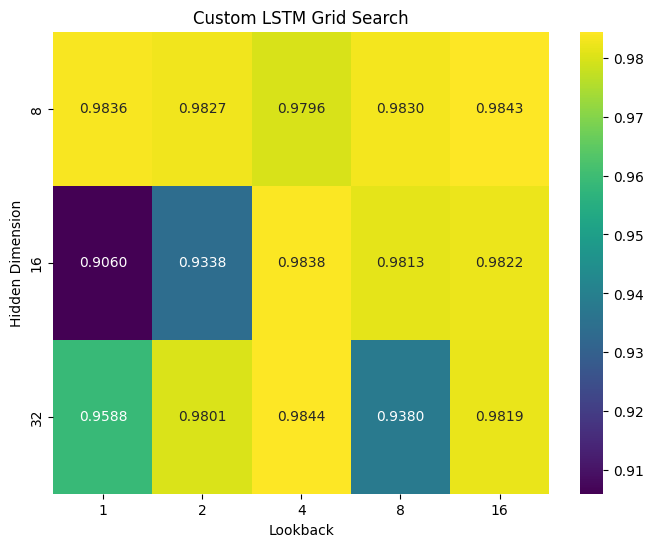

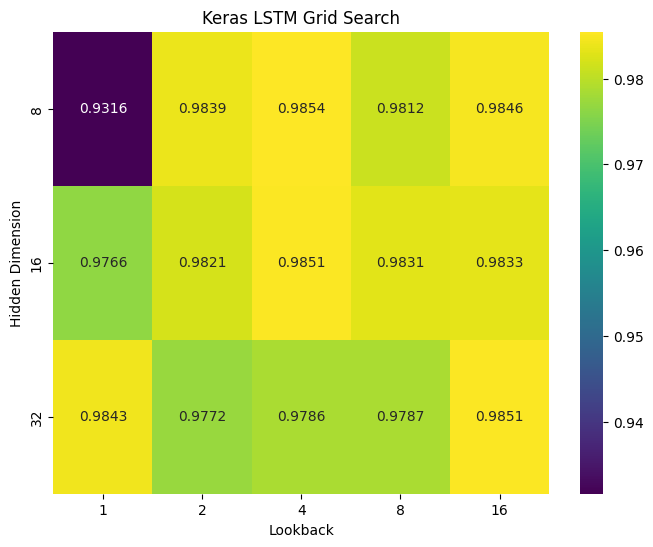

In [9]:
plot_grid_search_heatmap(results_custom, "r2", title="Custom LSTM Grid Search")
plot_grid_search_heatmap(results_keras, "r2", title="Keras LSTM Grid Search")

## Custom LSTM


In [10]:
optimal_lookback_custom = best_result_custom["params"]["lookback"]
optimal_hidden_dim_custom = best_result_custom["params"]["hidden_dim"]
optimizer = AdamLSTM(learning_rate=learning_rate)
custom_model = LSTMNetwork(
    input_dim, optimal_hidden_dim_custom, output_dim, future_steps, optimizer=optimizer
)

# X_train: (batch_size, seq_len, input_dim)
# y_train: (batch_size, future_steps, output_dim)
X_train, Y_train, X_test, Y_test, df_resampled, scalar = prepare_eth_data(
    data_file_path,
    lookback=optimal_lookback_custom,
    horizon=future_steps,
    freq="D",  # daily aggregation
    split_ratio=0.8,
)

custom_model.train(X_train, Y_train, epochs=epochs, batch_size=batch_size)

X_train shape: (2100, 16, 5), Y_train shape: (2100, 1, 1)
Epoch 1/50, Loss: 0.002856
Epoch 2/50, Loss: 0.000490
Epoch 3/50, Loss: 0.000447
Epoch 4/50, Loss: 0.000404
Epoch 5/50, Loss: 0.000407
Epoch 6/50, Loss: 0.000402
Epoch 7/50, Loss: 0.000376
Epoch 8/50, Loss: 0.000377
Epoch 9/50, Loss: 0.000446
Epoch 10/50, Loss: 0.000401
Epoch 11/50, Loss: 0.000364
Epoch 12/50, Loss: 0.000342
Epoch 13/50, Loss: 0.000396
Epoch 14/50, Loss: 0.000405
Epoch 15/50, Loss: 0.000319
Epoch 16/50, Loss: 0.000315
Epoch 17/50, Loss: 0.000326
Epoch 18/50, Loss: 0.000401
Epoch 19/50, Loss: 0.000316
Epoch 20/50, Loss: 0.000347
Epoch 21/50, Loss: 0.000321
Epoch 22/50, Loss: 0.000312
Epoch 23/50, Loss: 0.000315
Epoch 24/50, Loss: 0.000329
Epoch 25/50, Loss: 0.000301
Epoch 26/50, Loss: 0.000361
Epoch 27/50, Loss: 0.000302
Epoch 28/50, Loss: 0.000337
Epoch 29/50, Loss: 0.000311
Epoch 30/50, Loss: 0.000367
Epoch 31/50, Loss: 0.000341
Epoch 32/50, Loss: 0.000304
Epoch 33/50, Loss: 0.000368
Epoch 34/50, Loss: 0.000326

## Keras LSTM


In [34]:
from ml_p3.kerasLSTM import (
    prepare_data_for_keras,
    build_model,
    train_model,
    evaluate_model,
)

optimal_lookback_kearas = best_result_keras["params"]["lookback"]
optimal_hidden_dim_keras = best_result_keras["params"]["hidden_dim"]

Y_train_keras, Y_test_keras = prepare_data_for_keras(Y_train, Y_test)
keras_model = build_model(
    optimal_lookback_kearas,
    input_dim,
    optimal_hidden_dim_keras,
    output_dim,
    learning_rate=learning_rate,
)
history = train_model(
    keras_model, X_train, Y_train_keras, epochs=batch_size, batch_size=batch_size
)

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 8)              │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0284 - val_loss: 7.8011e-04
Epoch 2/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5367e-04 - val_loss: 2.1059e-04
Epoch 3/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6514e-04 - val_loss: 2.3750e-04
Epoch 4/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4172e-04 - val_loss: 2.3157e-04
Epoch 5/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0826e-04 - val_loss: 2.1396e-04
Epoch 6/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7929e-04 - val_loss: 4.3337e-04
Epoch 7/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4387e-04 - val_loss: 3.6187e-04
Epoch 8/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3374e-04 - val_loss: 2.8901e-04
Epoch 9/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5488e-04 - val_loss: 1.7130e-04
Epoch 10/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3732e-04 - val_loss: 4.6042e-04
Epoch 11/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2607e-04 - val_loss: 2

In [35]:
print(optimal_lookback_kearas)

4


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Optimal lookback Custom: 16
Optimal hidden dim Custom: 8
Optimal lookback Keras: 4
Optimal hidden dim Keras: 8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Best R2 Custom: 0.9853
Best R2 Keras: 0.9847
(513, 1, 1)


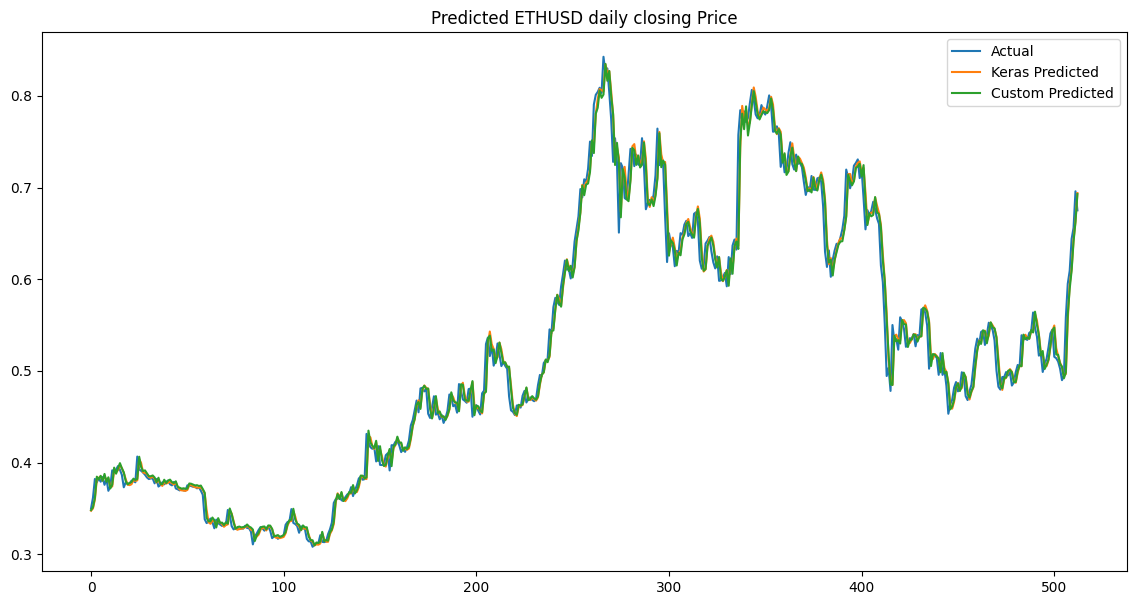

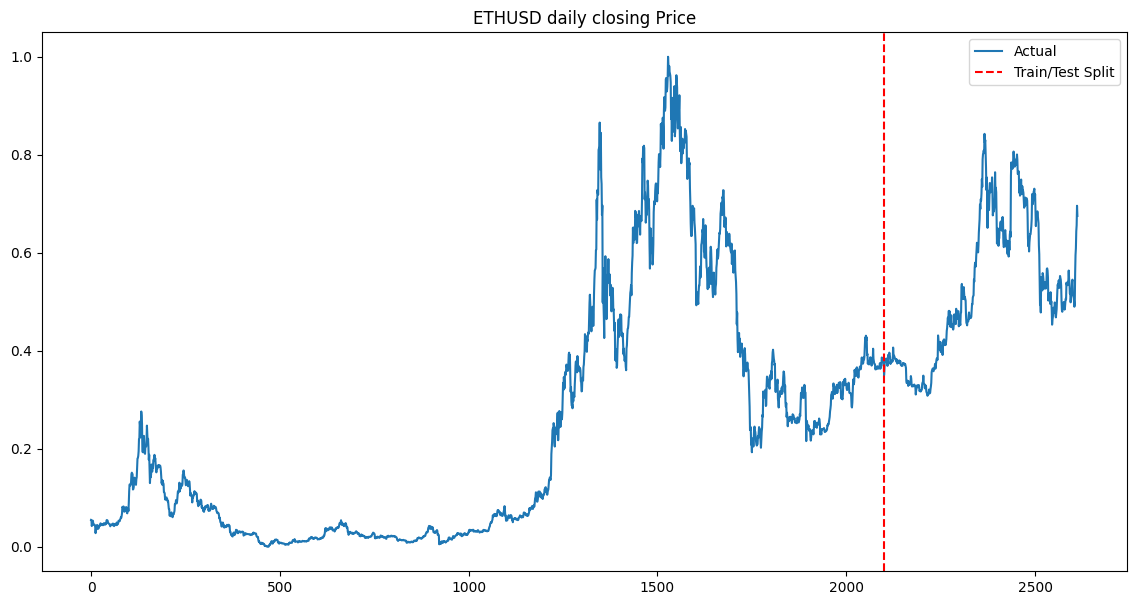

In [38]:
import numpy as np


y_pred = custom_model.predict(X_test)
y_pred_keras = keras_model.predict(X_test)

print(f"Optimal lookback Custom: {optimal_lookback_custom}")
print(f"Optimal hidden dim Custom: {optimal_hidden_dim_custom}")

print(f"Optimal lookback Keras: {optimal_lookback_kearas}")
print(f"Optimal hidden dim Keras: {optimal_hidden_dim_keras}")


best_r2_custom = custom_model.scores(X_test, Y_test)["r2"]
_, scores = evaluate_model(keras_model, X_test, Y_test_keras)
best_r2_keras = scores["r2"]

print(f"Best R2 Custom: {best_r2_custom:.4f}")
print(f"Best R2 Keras: {best_r2_keras:.4f}")
print(y_pred.shape)
plt.figure(figsize=(14, 7))
plot_eth_data(Y_test, "Actual")
plot_eth_data(y_pred_keras, "Keras Predicted")
plot_eth_data(y_pred, "Custom Predicted")
plt.title("Predicted ETHUSD daily closing Price")
plt.show()

training_and_test = np.concatenate((Y_train, Y_test), axis=0)
plt.figure(figsize=(14, 7))
plot_eth_data(training_and_test, "Actual")
split_index = len(Y_train)
plt.axvline(x=split_index, color='r', linestyle='--', label='Train/Test Split')
plt.title("ETHUSD daily closing Price")
plt.legend()
plt.show()

In [40]:
from keras.api.models import save_model
save_model(keras_model, "keras_model.keras")